In [1]:
# Import libraries 
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

TESS = "/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
RAV = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
SAVEE = "/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/"

# Run one example 
dir_list = os.listdir(SAVEE)
dir_list[0:5]

['JK_n06.wav', 'JE_n01.wav', 'JK_h12.wav', 'JE_su15.wav', 'DC_h14.wav']

In [3]:
# Get the data location for SAVEE
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('male_angry')
    elif i[-8:-6]=='_d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='_f':
        emotion.append('male_fear')
    elif i[-8:-6]=='_h':
        emotion.append('male_happy')
    elif i[-8:-6]=='_n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error') 
    path.append(SAVEE + i)
    
# Now check out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df.labels.value_counts()

male_neutral     120
male_angry        60
male_sad          60
male_surprise     60
male_disgust      60
male_fear         60
male_happy        60
Name: labels, dtype: int64

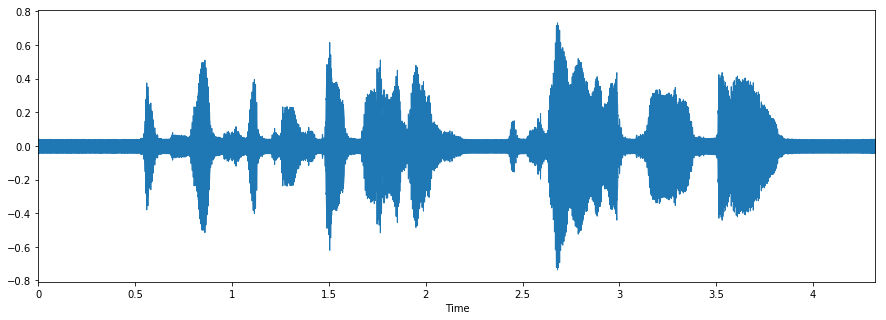

In [4]:
# use the well known Librosa library for this task 
fname = SAVEE + 'DC_f11.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

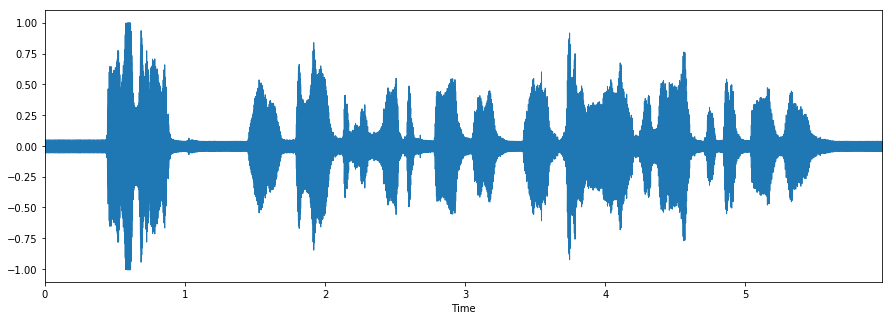

In [5]:
# Lets play a happy track
fname = SAVEE + 'DC_h11.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

In [6]:
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)

        
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

male_neutral       144
female_neutral     144
male_sad            96
female_happy        96
female_surprise     96
female_disgust      96
female_fear         96
female_sad          96
male_fear           96
male_happy          96
male_angry          96
male_disgust        96
male_surprise       96
female_angry        96
Name: labels, dtype: int64

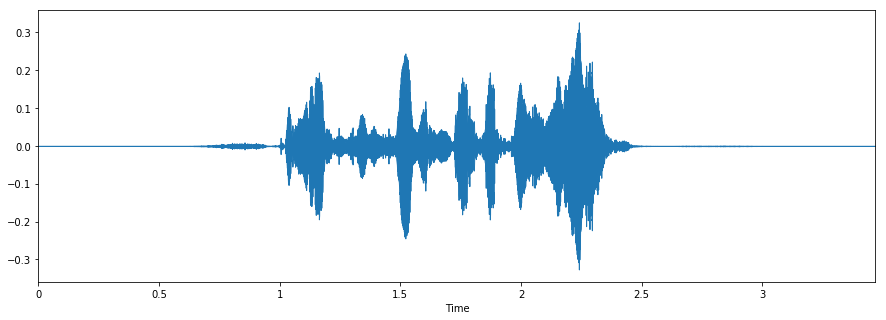

In [7]:
# Pick a fearful track
fname = RAV + 'Actor_14/03-01-06-02-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

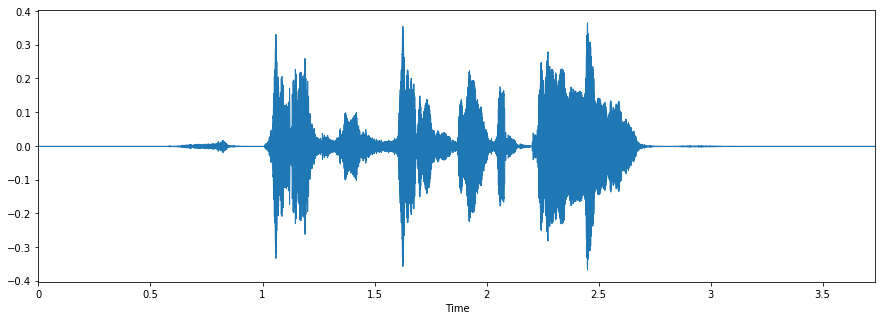

In [8]:
# Pick a happy track
fname = RAV + 'Actor_14/03-01-03-02-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

In [9]:
dir_list = os.listdir(TESS)
dir_list.sort()
dir_list

['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [10]:
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

female_happy       400
female_disgust     400
female_fear        400
female_sad         400
female_neutral     400
female_angry       400
female_surprise    400
Name: labels, dtype: int64

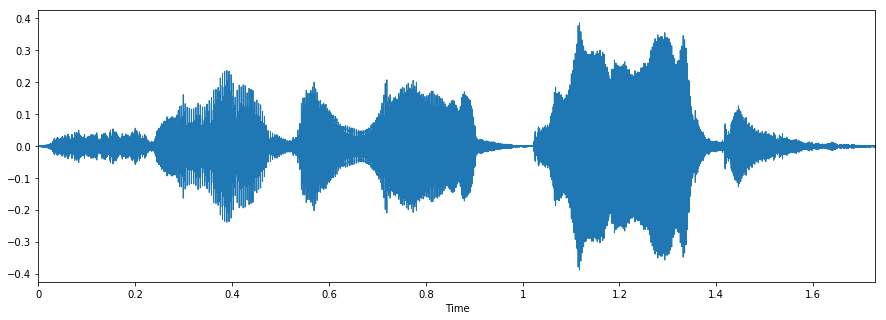

In [11]:
# lets play a fearful track 
fname = TESS + 'YAF_fear/YAF_dog_fear.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

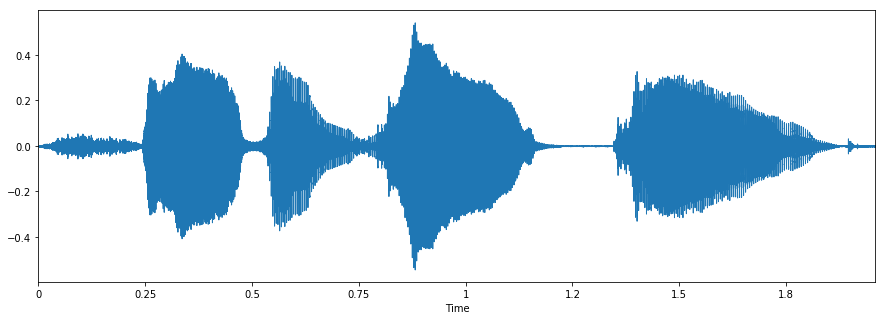

In [12]:
# lets play a happy track 
fname =  TESS + 'YAF_happy/YAF_dog_happy.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

In [13]:
EmotionData = pd.concat([SAVEE_df, RAV_df, TESS_df], axis = 0)
print(EmotionData.labels.value_counts())
#EmotionData.head()
EmotionData.to_csv("Data_path.csv",index=False)

female_neutral     544
female_happy       496
female_disgust     496
female_fear        496
female_sad         496
female_angry       496
female_surprise    496
male_neutral       264
male_happy         156
male_sad           156
male_fear          156
male_angry         156
male_disgust       156
male_surprise      156
Name: labels, dtype: int64


In [14]:
EmotionData.tail()

labels source                                               path
2795  female_sad   TESS  /kaggle/input/toronto-emotional-speech-set-tes...
2796  female_sad   TESS  /kaggle/input/toronto-emotional-speech-set-tes...
2797  female_sad   TESS  /kaggle/input/toronto-emotional-speech-set-tes...
2798  female_sad   TESS  /kaggle/input/toronto-emotional-speech-set-tes...
2799  female_sad   TESS  /kaggle/input/toronto-emotional-speech-set-tes...

In [15]:
# lets pick up the meta-data that we got from our first part of the Kernel
ref = pd.read_csv("Data_path.csv")
ref.head()

labels source                                               path
0   male_neutral  SAVEE  /kaggle/input/surrey-audiovisual-expressed-emo...
1   male_neutral  SAVEE  /kaggle/input/surrey-audiovisual-expressed-emo...
2     male_happy  SAVEE  /kaggle/input/surrey-audiovisual-expressed-emo...
3  male_surprise  SAVEE  /kaggle/input/surrey-audiovisual-expressed-emo...
4     male_happy  SAVEE  /kaggle/input/surrey-audiovisual-expressed-emo...

**FEATURE EXTRACTION**
There are lots of features which we can get from an audio data such as 
* Spectral Centroid
* Zero Crossing Rate
* Chroma Frequencies
* Mel Frequency Ceptral Coefficient(MFCC)
* Spectral Roll off
But for human voice characterization and modelling MFCC is the best feature so that's why we are using MFCC feature and extract it for each of the data.

Lets extract MFCC feature for one of the example voice

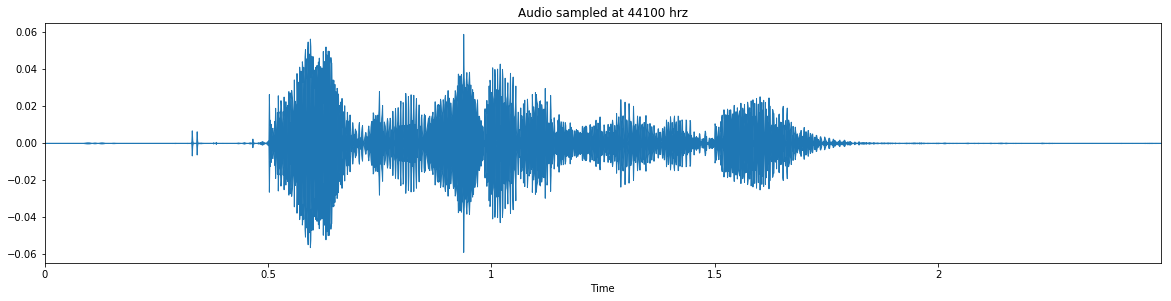

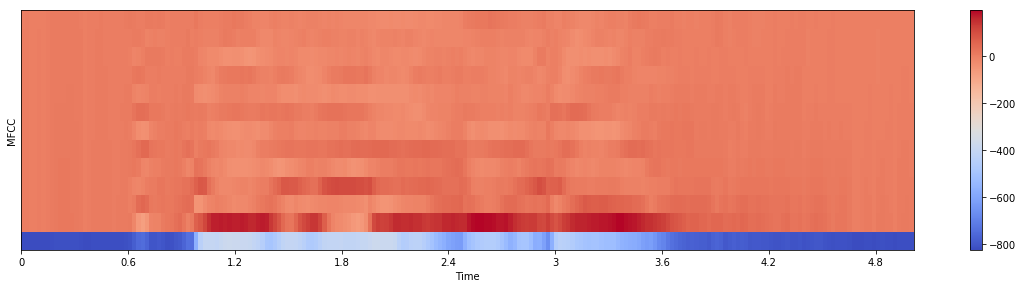

In [16]:
# Source - RAVDESS; Gender - Male; Emotion - Happy 
path = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_11/03-01-03-01-02-02-11.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
#Here we are displaying Spectrogram for the Happy voice and lets visualiza how its look like
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

Now lets extract this feature for entire dataset and then concatinate this feature column into our dataframe

In [17]:
df = pd.DataFrame(columns=['feature'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path
                                  , res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    
    # mean as the feature. Could do min and max etc as well. 
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=13),
                    axis=0)
    df.loc[counter] = [mfccs]
    counter=counter+1   

# Check a few records to make sure its processed successfully
print(len(df))
df.head()

4720


feature
0  [-14.072133, -9.97294, -5.366854, -3.891674, -...
1  [1.1729177, 1.3117932, -2.4337394, -3.3272119,...
2  [-4.2189293, -5.046677, -1.9361663, -0.1161819...
3  [-24.38109, -24.257326, -24.679512, -25.838972...
4  [-0.542832, -3.7041, -13.20999, -13.317596, -1...

In [18]:
#concatinating the feature column into the complete dataframe
df = pd.concat([ref,pd.DataFrame(df['feature'].values.tolist())],axis=1)
df[:5]

labels source                                               path  \
0   male_neutral  SAVEE  /kaggle/input/surrey-audiovisual-expressed-emo...   
1   male_neutral  SAVEE  /kaggle/input/surrey-audiovisual-expressed-emo...   
2     male_happy  SAVEE  /kaggle/input/surrey-audiovisual-expressed-emo...   
3  male_surprise  SAVEE  /kaggle/input/surrey-audiovisual-expressed-emo...   
4     male_happy  SAVEE  /kaggle/input/surrey-audiovisual-expressed-emo...   

           0          1          2          3          4          5  \
0 -14.072133  -9.972940  -5.366854  -3.891674  -3.468010  -3.845379   
1   1.172918   1.311793  -2.433739  -3.327212  -4.228230  -4.150954   
2  -4.218929  -5.046677  -1.936166  -0.116182  -2.659663  -4.161142   
3 -24.381090 -24.257326 -24.679512 -25.838972 -25.940269 -24.709154   
4  -0.542832  -3.704100 -13.209990 -13.317596 -12.084839 -10.208435   

           6  ...        206        207        208        209        210  \
0  -5.751581  ... -22.615152 -22.693382 -23.555685 -24.527912 -24.788836   
1  -6.742835  ...  -5.774354  -7.694171  -8.150679  -8.313456  -7.624996   
2  -5.404809  ... -12.548601  -7.113556  -4.022944  -3.119712  -3.317943   
3 -25.388950  ...  -7.448040 -13.810625 -16.098106 -19.066858 -21.740877   
4 -12.682105  ... -15.743803 -12.911619 -11.744253  -9.940100 -10.685195   

         211        212        213        214        215  
0 -27.032894 -28.547741 -25.332327 -15.255977 -10.419216  
1  -6.536054  -5.755507  -5.100694  -3.599757  -1.901697  
2  -3.120361  -3.034866  -2.924093  -2.968277  -0.634218  
3 -22.288059 -22.391567 -21.036652 -18.525318 -21.011656  
4  -9.927692  -9.015005  -7.486831  -4.142284   0.820213  

[5 rows x 219 columns]

In [19]:
# replace NA with 0
df=df.fillna(0)
print(df.shape)
df[:5]

(4720, 219)


labels source                                               path  \
0   male_neutral  SAVEE  /kaggle/input/surrey-audiovisual-expressed-emo...   
1   male_neutral  SAVEE  /kaggle/input/surrey-audiovisual-expressed-emo...   
2     male_happy  SAVEE  /kaggle/input/surrey-audiovisual-expressed-emo...   
3  male_surprise  SAVEE  /kaggle/input/surrey-audiovisual-expressed-emo...   
4     male_happy  SAVEE  /kaggle/input/surrey-audiovisual-expressed-emo...   

           0          1          2          3          4          5  \
0 -14.072133  -9.972940  -5.366854  -3.891674  -3.468010  -3.845379   
1   1.172918   1.311793  -2.433739  -3.327212  -4.228230  -4.150954   
2  -4.218929  -5.046677  -1.936166  -0.116182  -2.659663  -4.161142   
3 -24.381090 -24.257326 -24.679512 -25.838972 -25.940269 -24.709154   
4  -0.542832  -3.704100 -13.209990 -13.317596 -12.084839 -10.208435   

           6  ...        206        207        208        209        210  \
0  -5.751581  ... -22.615152 -22.693382 -23.555685 -24.527912 -24.788836   
1  -6.742835  ...  -5.774354  -7.694171  -8.150679  -8.313456  -7.624996   
2  -5.404809  ... -12.548601  -7.113556  -4.022944  -3.119712  -3.317943   
3 -25.388950  ...  -7.448040 -13.810625 -16.098106 -19.066858 -21.740877   
4 -12.682105  ... -15.743803 -12.911619 -11.744253  -9.940100 -10.685195   

         211        212        213        214        215  
0 -27.032894 -28.547741 -25.332327 -15.255977 -10.419216  
1  -6.536054  -5.755507  -5.100694  -3.599757  -1.901697  
2  -3.120361  -3.034866  -2.924093  -2.968277  -0.634218  
3 -22.288059 -22.391567 -21.036652 -18.525318 -21.011656  
4  -9.927692  -9.015005  -7.486831  -4.142284   0.820213  

[5 rows x 219 columns]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1)
                                                    , df.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation 
X_train[150:160]

0          1          2          3          4          5    \
4586 -11.605530 -15.317912 -28.433889 -26.804739 -26.296177 -26.475597   
1022 -41.220757 -41.220757 -41.134964 -41.220757 -41.220757 -41.220757   
3733 -13.157070 -16.631344 -26.311680 -23.207670 -20.393362 -22.235582   
4612  -2.602005  -7.015189 -24.806040 -24.764717 -25.714037 -25.944113   
2677 -17.356977 -19.713331 -31.021023 -31.591860 -32.994602 -34.104496   
2830 -23.981224 -25.897125 -27.421196 -26.117933 -28.306170 -28.960951   
1662 -64.176727 -64.176727 -64.176727 -64.176727 -64.176727 -64.176727   
665  -65.616623 -65.616623 -65.616623 -65.629974 -64.431618 -64.589775   
3528 -14.514777 -18.887520 -38.246109 -38.562660 -36.238274 -33.811241   
4252  -9.366400 -12.885976 -22.487171 -22.426579 -22.432018 -21.549898   

            6          7          8          9    ...        206        207  \
4586 -26.264439 -25.411522 -24.683199 -26.987247  ...   0.000000   0.000000   
1022 -41.220757 -41.220757 -40.736546 -41.220757  ... -30.911304 -31.994343   
3733 -24.741966 -28.069279 -29.246199 -28.346235  ...   0.000000   0.000000   
4612 -26.420652 -26.729441 -25.287441 -23.016094  ...   0.000000   0.000000   
2677 -31.517870 -29.456980 -30.125694 -32.980606  ...   0.000000   0.000000   
2830 -29.066124 -28.689945 -28.872694 -29.775795  ...   0.000000   0.000000   
1662 -64.176727 -64.176727 -64.176727 -64.176727  ... -58.868187 -58.210472   
665  -65.616623 -65.616623 -65.616623 -65.616623  ... -59.192467 -59.438904   
3528 -36.015213 -36.244133 -35.869846 -34.749660  ...   0.000000   0.000000   
4252 -22.218781 -23.008524 -22.861528 -23.109966  ...   0.000000   0.000000   

            208        209        210        211        212        213  \
4586   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1022 -35.412186 -34.892227 -32.714180 -34.465919 -34.465229 -35.939720   
3733   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
4612   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
2677   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
2830   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1662 -60.469254 -62.210712 -62.129726 -63.643379 -64.176727 -61.997288   
665  -62.978237 -60.258266 -57.235451 -55.851681 -58.888943 -59.853691   
3528   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
4252   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   

            214        215  
4586   0.000000   0.000000  
1022 -31.809278 -25.293327  
3733   0.000000   0.000000  
4612   0.000000   0.000000  
2677   0.000000   0.000000  
2830   0.000000   0.000000  
1662 -61.251625 -58.764042  
665  -61.910088 -61.882729  
3528   0.000000   0.000000  
4252   0.000000   0.000000  

[10 rows x 216 columns]

In [22]:
# Lets do data normalization
#Here we are using z-score normalization technique
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Check the dataset now 
X_train[150:160]

0         1         2         3         4         5         6    \
4586  0.879470  0.837524  0.529960  0.626015  0.645878  0.621794  0.624164   
1022 -0.639537 -0.594433 -0.340940 -0.353984 -0.359494 -0.366188 -0.372151   
3733  0.799890  0.764915  0.675478  0.870543  1.043512  0.905891  0.725583   
4612  1.341274  1.296513  0.778718  0.764695  0.685093  0.657406  0.613758   
2677  0.584470  0.594537  0.352563  0.300587  0.194649  0.110629  0.274207   
2830  0.244703  0.252685  0.599399  0.672704  0.510478  0.455266  0.437530   
1662 -1.816982 -1.863480 -1.920892 -1.914527 -1.905888 -1.904326 -1.901363   
665  -1.890836 -1.943080 -2.019624 -2.013319 -1.923058 -1.932001 -1.997281   
3528  0.730251  0.640189 -0.142854 -0.173287 -0.023856  0.130278 -0.025384   
4252  0.994318  0.971965  0.937721  0.923642  0.906181  0.951835  0.893665   

           7         8         9    ...       206       207       208  \
4586  0.671044  0.713114  0.556896  ...  0.708933  0.709147  0.708400   
1022 -0.376025 -0.349569 -0.384250  ... -0.691493 -0.734096 -0.883415   
3733  0.495017  0.411057  0.467037  ...  0.708933  0.709147  0.708400   
4612  0.583756  0.673115  0.819477  ...  0.708933  0.709147  0.708400   
2677  0.403107  0.352837  0.160604  ...  0.708933  0.709147  0.708400   
2830  0.453909  0.435782  0.372512  ...  0.708933  0.709147  0.708400   
1662 -1.896432 -1.901238 -1.902143  ... -1.958070 -1.916688 -2.009757   
665  -1.991799 -1.996555 -1.997352  ... -1.972761 -1.972102 -2.122538   
3528 -0.046416 -0.027408  0.043631  ...  0.708933  0.709147  0.708400   
4252  0.830198  0.833703  0.813270  ...  0.708933  0.709147  0.708400   

           209       210       211       212       213       214       215  
4586  0.707866  0.707357  0.707298  0.706500  0.705739  0.693696  0.680510  
1022 -0.854789 -0.752410 -0.824018 -0.815710 -0.872933 -0.704845 -0.425760  
3733  0.707866  0.707357  0.707298  0.706500  0.705739  0.693696  0.680510  
4612  0.707866  0.707357  0.707298  0.706500  0.705739  0.693696  0.680510  
2677  0.707866  0.707357  0.707298  0.706500  0.705739  0.693696  0.680510  
2830  0.707866  0.707357  0.707298  0.706500  0.705739  0.693696  0.680510  
1662 -2.078252 -2.064986 -2.120370 -2.127964 -2.017526 -1.999321 -1.889690  
665  -1.990812 -1.846595 -1.774185 -1.894421 -1.923367 -2.028271 -2.026094  
3528  0.707866  0.707357  0.707298  0.706500  0.705739  0.693696  0.680510  
4252  0.707866  0.707357  0.707298  0.706500  0.705739  0.693696  0.680510  

[10 rows x 216 columns]

In [23]:
from keras.utils import np_utils, to_categorical
from sklearn.preprocessing import LabelEncoder
import pickle

Using TensorFlow backend.


In [24]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Label encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.classes_)
#print(y_train[0:10])
#print(y_test[0:10])

# Pickel the lb object for future use 
filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()

(3540, 216)
['female_angry' 'female_disgust' 'female_fear' 'female_happy'
 'female_neutral' 'female_sad' 'female_surprise' 'male_angry'
 'male_disgust' 'male_fear' 'male_happy' 'male_neutral' 'male_sad'
 'male_surprise']


In [25]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(3540, 216, 1)

In [26]:
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

In [27]:
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1))) 
# X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(14)) # Target class number
model.add(Activation('softmax'))
opt = keras.optimizers.Adam(lr=0.0001)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 216, 256)          2304      
_________________________________________________________________
activation_1 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 216, 256)          524544    
_________________________________________________________________
batch_normalization_1 (Batch (None, 216, 256)          1024      
_________________________________________________________________
activation_2 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 216, 256)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 27, 256)           0         
__________

In [28]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=10, epochs=75, validation_data=(X_test, y_test))

Train on 3540 samples, validate on 1180 samples
Epoch 1/75
3540/3540 [==============================] - 14s 4ms/step - loss: 1.7388 - acc: 0.4011 - val_loss: 1.6810 - val_acc: 0.5153
Epoch 2/75
3540/3540 [==============================] - 5s 1ms/step - loss: 1.2296 - acc: 0.5616 - val_loss: 1.2876 - val_acc: 0.5864
Epoch 3/75
3540/3540 [==============================] - 5s 1ms/step - loss: 1.0564 - acc: 0.6277 - val_loss: 1.1366 - val_acc: 0.6254
Epoch 4/75
3540/3540 [==============================] - 5s 1ms/step - loss: 0.9579 - acc: 0.6605 - val_loss: 1.0776 - val_acc: 0.6525
Epoch 5/75
3540/3540 [==============================] - 5s 1ms/step - loss: 0.8810 - acc: 0.6864 - val_loss: 1.1080 - val_acc: 0.6271
Epoch 6/75
3540/3540 [==============================] - 5s 1ms/step - loss: 0.8320 - acc: 0.7006 - val_loss: 0.9923 - val_acc: 0.6703
Epoch 7/75
3540/3540 [==============================] - 5s 1ms/step - loss: 0.7633 - acc: 0.7237 - val_loss: 1.0035 - val_acc: 0.6542
Epoch 8/75
35

3540/3540 [==============================] - 5s 1ms/step - loss: 0.0428 - acc: 0.9859 - val_loss: 1.1322 - val_acc: 0.7271
Epoch 62/75
3540/3540 [==============================] - 5s 1ms/step - loss: 0.0352 - acc: 0.9887 - val_loss: 1.0997 - val_acc: 0.7195
Epoch 63/75
3540/3540 [==============================] - 5s 1ms/step - loss: 0.0386 - acc: 0.9893 - val_loss: 1.1194 - val_acc: 0.7119
Epoch 64/75
3540/3540 [==============================] - 5s 1ms/step - loss: 0.0133 - acc: 0.9966 - val_loss: 1.1285 - val_acc: 0.7136
Epoch 65/75
3540/3540 [==============================] - 5s 1ms/step - loss: 0.0549 - acc: 0.9816 - val_loss: 1.0560 - val_acc: 0.7288
Epoch 66/75
3540/3540 [==============================] - 5s 1ms/step - loss: 0.0290 - acc: 0.9890 - val_loss: 1.0345 - val_acc: 0.7297
Epoch 67/75
3540/3540 [==============================] - 5s 1ms/step - loss: 0.0165 - acc: 0.9952 - val_loss: 1.0812 - val_acc: 0.7305
Epoch 68/75
3540/3540 [==============================] - 5s 1ms/ste

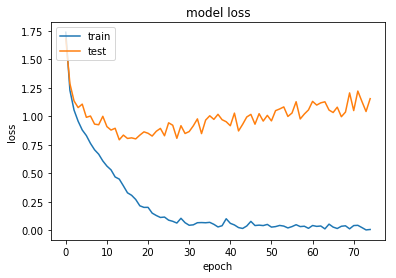

In [29]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Observation**

Here we found that Accuracy is arround 0.9901 and loss is 0.0291 
But When we look around Validation set we found that val_loss: 1.0878  val_acc: 0.7398
Which signifies the overfitting as val_loss>train_loss

**To reduche the overfitting**
We require to improve the dataset: For that we will use data augmentation
Next we will use 2D convNet or any other model to train our data

In [30]:
# Save model and weights
model_name = 'Emotion_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Save model and weights at %s ' % model_path)

# Save the model to disk
model_json = model.to_json()
with open("model_json.json", "w") as json_file:
    json_file.write(model_json)

Save model and weights at /kaggle/working/saved_models/Emotion_Model.h5 


In [31]:
# loading json and model architecture 
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Model.h5")
print("Loaded model from disk")
 
# Keras optimiser
opt = keras.optimizers.Adam(lr=0.0001)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 72.54%


In [32]:
preds = loaded_model.predict(X_test, 
                         batch_size=10, 
                         verbose=1)

preds=preds.argmax(axis=1)
preds

1180/1180 [==============================] - 1s 593us/step


array([ 5,  4, 13, ...,  5,  5,  2])

In [33]:
# predictions 
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)
finaldf.head()

actualvalues predictedvalues
0       female_sad      female_sad
1  female_surprise  female_neutral
2       male_happy   male_surprise
3     male_neutral    male_neutral
4     female_angry    female_angry

In [34]:
finaldf.to_csv('Predictions.csv', index=False)
finaldf.groupby('predictedvalues').count()

actualvalues
predictedvalues              
female_angry              136
female_disgust            126
female_fear               123
female_happy              124
female_neutral            132
female_sad                129
female_surprise           107
male_angry                 51
male_disgust               28
male_fear                  19
male_happy                 23
male_neutral               78
male_sad                   49
male_surprise              55

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [36]:
classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

                 precision    recall  f1-score   support

   female_angry       0.80      0.81      0.81       134
 female_disgust       0.79      0.88      0.84       113
    female_fear       0.80      0.85      0.82       115
   female_happy       0.84      0.83      0.83       126
 female_neutral       0.85      0.86      0.85       130
     female_sad       0.84      0.84      0.84       128
female_surprise       0.92      0.75      0.83       130
     male_angry       0.47      0.60      0.53        40
   male_disgust       0.50      0.33      0.39        43
      male_fear       0.26      0.13      0.18        38
     male_happy       0.43      0.30      0.36        33
   male_neutral       0.55      0.57      0.56        75
       male_sad       0.22      0.31      0.26        35
  male_surprise       0.36      0.50      0.42        40

       accuracy                           0.73      1180
      macro avg       0.62      0.61      0.61      1180
   weighted avg       0.73   

In [37]:
import seaborn as sns

In [38]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Gender recode function
def gender(row):
    if row == 'female_disgust' or 'female_fear' or 'female_happy' or 'female_sad' or 'female_surprise' or 'female_neutral':
        return 'female'
    elif row == 'male_angry' or 'male_fear' or 'male_happy' or 'male_sad' or 'male_surprise' or 'male_neutral' or 'male_disgust':
        return 'male'

0.7254237288135593


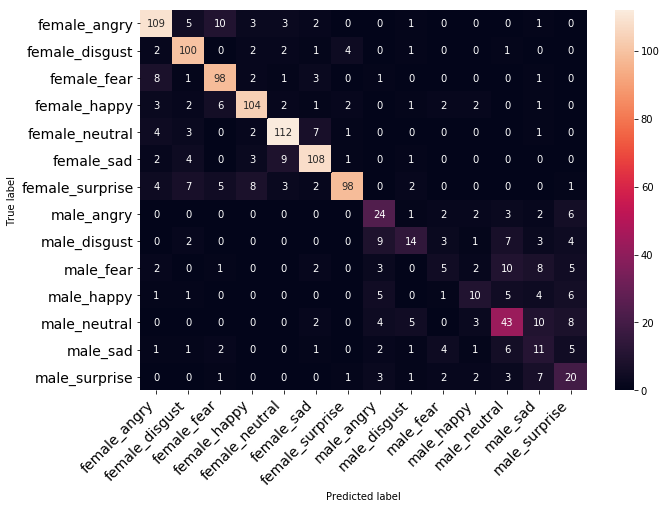

In [39]:
# Get the predictions file 
finaldf = pd.read_csv("Predictions.csv")
classes = finaldf.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

Now let's see how we can reduce the wrong prediction i.e False Positive and False Negatives

# Data Augmentation
Lets add augmented data to our Dataset
Before proceeding lets understand some of the datasets

In [40]:
# Augmentation methods
#########################
def noise(data):
    """
    Adding White Noise.
    """
    # you can take any distribution from https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html
    noise_amp = 0.05*np.random.uniform()*np.amax(data)   # more noise reduce the value to 0.5
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data
    
def shift(data):
    """
    Random Shifting.
    """
    s_range = int(np.random.uniform(low=-5, high = 5)*1000)  #default at 500
    return np.roll(data, s_range)
    
def stretch(data, rate=0.8):
    """
    Streching the Sound. Note that this expands the dataset slightly
    """
    data = librosa.effects.time_stretch(data, rate)
    return data
    
def pitch(data, sample_rate):
    """
    Pitch Tuning.
    """
    bins_per_octave = 12
    pitch_pm = 2
    pitch_change =  pitch_pm * 2*(np.random.uniform())   
    data = librosa.effects.pitch_shift(data.astype('float64'), 
                                      sample_rate, n_steps=pitch_change, 
                                      bins_per_octave=bins_per_octave)
    return data
    
def dyn_change(data):
    """
    Random Value Change.
    """
    dyn_change = np.random.uniform(low=-0.5 ,high=7)  # default low = 1.5, high = 3
    return (data * dyn_change)
    
def speedNpitch(data):
    """
    peed and Pitch Tuning.
    """
    # you can change low and high here
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.2  / length_change # try changing 1.0 to 2.0 ... =D
    tmp = np.interp(np.arange(0,len(data),speed_fac),np.arange(0,len(data)),data)
    minlen = min(data.shape[0], tmp.shape[0])
    data *= 0
    data[0:minlen] = tmp[0:minlen]
    return data


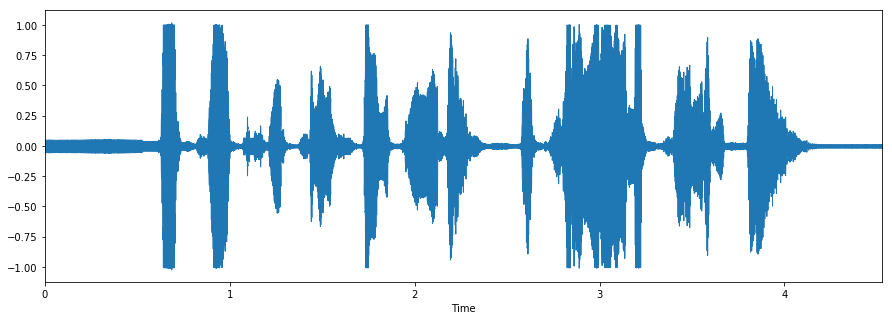

In [41]:
# Use one audio file in previous parts again
fname = '/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/JK_f11.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Play it again to refresh our memory
ipd.Audio(data, rate=sampling_rate)

Now add some augmentation into the voice

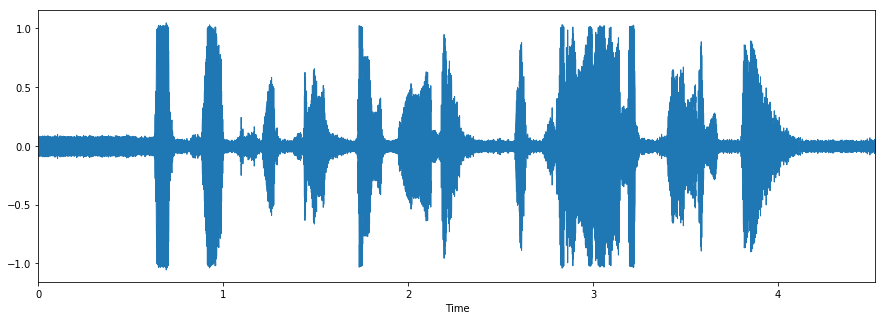

In [42]:
#Static Noise
x = noise(data)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

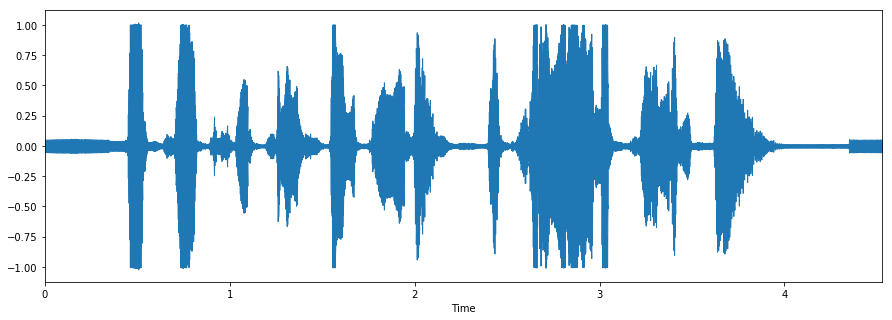

In [43]:
#shift: It basically add more time and shift the voice a little bit
x = shift(data)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

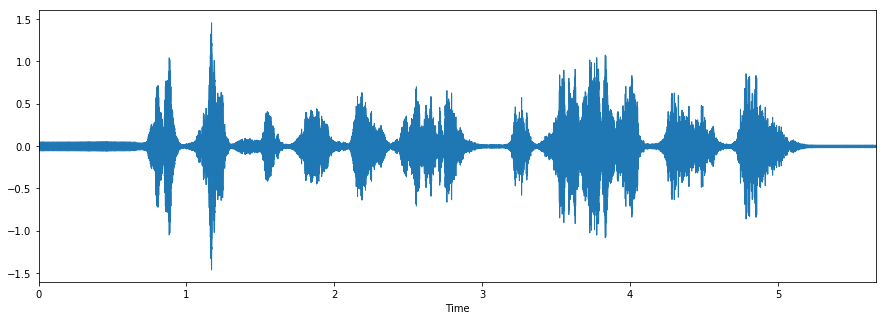

In [44]:
#Stretch: It basically slow down the speaking time 
x = stretch(data)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

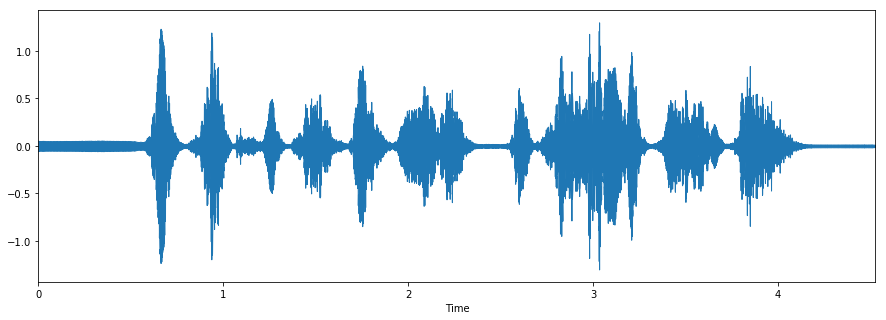

In [45]:
#It adds more pitch into the voice
x = pitch(data, sampling_rate)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

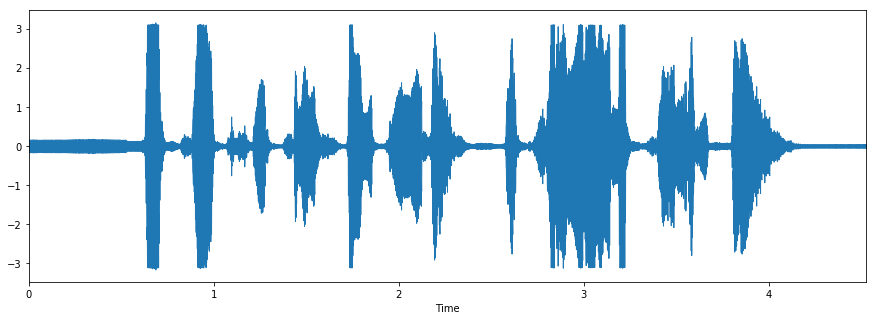

In [46]:
#Dynamic Change
x = dyn_change(data)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

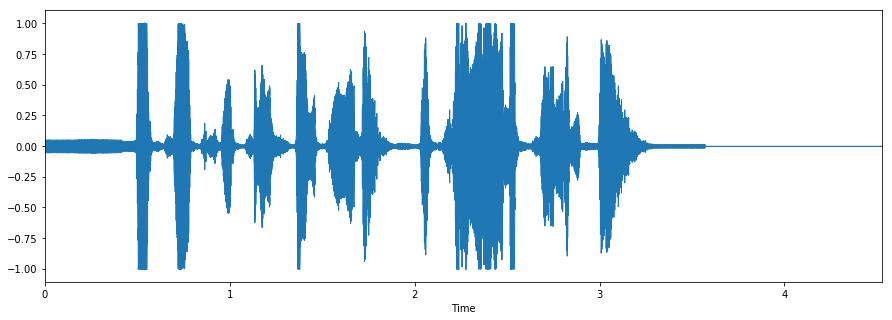

In [47]:
#Speed and Pitch: This one is basically the combination of both speed and pitch
x = speedNpitch(data)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

In [48]:
#Now choosing our meta data and augment the voice into the whole datasets
ref.head()

labels source                                               path
0   male_neutral  SAVEE  /kaggle/input/surrey-audiovisual-expressed-emo...
1   male_neutral  SAVEE  /kaggle/input/surrey-audiovisual-expressed-emo...
2     male_happy  SAVEE  /kaggle/input/surrey-audiovisual-expressed-emo...
3  male_surprise  SAVEE  /kaggle/input/surrey-audiovisual-expressed-emo...
4     male_happy  SAVEE  /kaggle/input/surrey-audiovisual-expressed-emo...

I am going to use Stretch and Dynamic change as other methods may reduce the accuracy.
If we add pitch or speed and pitch it will change the voice quality and seems like a female is taking althoug its a male's voice.

In [49]:
from tqdm import tqdm

In [50]:
# Note this takes a couple of minutes (~16 mins) as we're iterating over 4 datasets, and with augmentation  
df = pd.DataFrame(columns=['feature'])
df_dyn_change = pd.DataFrame(columns=['feature'])
df_stretch = pd.DataFrame(columns=['feature'])
cnt = 0

# loop feature extraction over the entire dataset
for i in tqdm(ref.path):
    
    # first load the audio 
    X, sample_rate = librosa.load(i
                                  , res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=44100
                                  ,offset=0.5
                                 )

    # take mfcc and mean as the feature. Could do min and max etc as well. 
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=np.array(sample_rate), 
                                        n_mfcc=13),
                    axis=0)
    
    df.loc[cnt] = [mfccs]   


    # dyn_change 
    aug = dyn_change(X)
    aug = np.mean(librosa.feature.mfcc(y=aug, 
                                    sr=np.array(sample_rate), 
                                    n_mfcc=13),    
                  axis=0)
    df_dyn_change.loc[cnt] = [aug]

    # stretch
    aug = stretch(X)
    aug = np.mean(librosa.feature.mfcc(y=aug, 
                                    sr=np.array(sample_rate), 
                                    n_mfcc=13),    
                  axis=0)
    df_stretch.loc[cnt] = [aug]   

    cnt += 1

df.head()

100%|██████████| 4720/4720 [07:47<00:00, 10.93it/s]


feature
0  [-14.072133, -9.97294, -5.366854, -3.891674, -...
1  [1.1729177, 1.3117932, -2.4337394, -3.3272119,...
2  [-4.2189293, -5.046677, -1.9361663, -0.1161819...
3  [-24.38109, -24.257326, -24.679512, -25.838972...
4  [-0.542832, -3.7041, -13.20999, -13.317596, -1...

In [51]:
#Combining the feature to the dataset
df = pd.concat([ref,pd.DataFrame(df['feature'].values.tolist())],axis=1)
df_dyn_change = pd.concat([ref,pd.DataFrame(df_dyn_change['feature'].values.tolist())],axis=1)
df_stretch = pd.concat([ref,pd.DataFrame(df_stretch['feature'].values.tolist())],axis=1)
print(df.shape,df_dyn_change.shape,df_stretch.shape)

(4720, 219) (4720, 219) (4720, 273)


In [52]:
df = pd.concat([df,df_dyn_change,df_stretch],axis=0,sort=False)
df=df.fillna(0)
del df_dyn_change,df_stretch

df.head()

labels source                                               path  \
0   male_neutral  SAVEE  /kaggle/input/surrey-audiovisual-expressed-emo...   
1   male_neutral  SAVEE  /kaggle/input/surrey-audiovisual-expressed-emo...   
2     male_happy  SAVEE  /kaggle/input/surrey-audiovisual-expressed-emo...   
3  male_surprise  SAVEE  /kaggle/input/surrey-audiovisual-expressed-emo...   
4     male_happy  SAVEE  /kaggle/input/surrey-audiovisual-expressed-emo...   

           0          1          2          3          4          5  \
0 -14.072133  -9.972940  -5.366854  -3.891674  -3.468010  -3.845379   
1   1.172918   1.311793  -2.433739  -3.327212  -4.228230  -4.150954   
2  -4.218929  -5.046677  -1.936166  -0.116182  -2.659663  -4.161142   
3 -24.381090 -24.257326 -24.679512 -25.838972 -25.940269 -24.709154   
4  -0.542832  -3.704100 -13.209990 -13.317596 -12.084839 -10.208435   

           6  ...  260  261  262  263  264  265  266  267  268  269  
0  -5.751581  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  -6.742835  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  -5.404809  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3 -25.388950  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4 -12.682105  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 273 columns]

In [53]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1)
                                                    , df.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation 
X_train[150:160]

0          1          2          3          4          5    \
3153 -18.437925 -22.283358 -30.822514 -31.537138 -31.393515 -30.832552   
1406 -52.593689 -52.593689 -52.593689 -52.593689 -52.593689 -52.593689   
3863 -21.849049 -20.800993 -21.582018 -21.868744 -24.339653 -27.635735   
3076 -31.789581 -34.943157 -38.648075 -39.397362 -38.606266 -40.145988   
1387 -63.983986 -63.983986 -63.983986 -63.983986 -63.983986 -63.983986   
1539 -56.844669 -56.844669 -56.844669 -56.844669 -56.844669 -56.844669   
852  -64.728020 -64.728020 -64.728020 -64.728020 -64.728020 -64.728020   
3164 -11.075211 -14.233290 -20.974161 -21.460520 -21.494610 -20.633614   
1909 -57.386948 -57.386948 -57.386948 -57.386948 -57.386948 -57.386948   
3948  -8.859373 -11.991054 -21.688663 -22.734680 -23.119740 -23.036020   

            6          7          8          9    ...        260        261  \
3153 -31.126503 -31.389313 -31.340792 -31.372358  ...   0.000000   0.000000   
1406 -52.593689 -52.593689 -52.593689 -52.593689  ...   0.000000   0.000000   
3863 -29.232338 -28.849995 -28.435202 -27.914724  ...   0.000000   0.000000   
3076 -41.706955 -43.258846 -42.845215 -44.068600  ...   0.000000   0.000000   
1387 -63.983986 -63.983986 -63.983986 -63.983986  ... -59.569923 -57.393925   
1539 -56.844669 -56.844669 -56.844669 -56.844669  ...   0.000000   0.000000   
852  -64.728020 -64.728020 -64.728020 -64.728020  ...   0.000000   0.000000   
3164 -21.641481 -21.504456 -20.788429 -20.528202  ...   0.000000   0.000000   
1909 -57.386948 -57.386948 -57.386948 -57.386948  ... -43.542885 -44.237568   
3948 -26.801304 -26.108471 -26.874943 -27.963169  ...   0.000000   0.000000   

           262        263        264        265        266        267  \
3153   0.00000   0.000000   0.000000   0.000000   0.000000   0.000000   
1406   0.00000   0.000000   0.000000   0.000000   0.000000   0.000000   
3863   0.00000   0.000000   0.000000   0.000000   0.000000   0.000000   
3076   0.00000   0.000000   0.000000   0.000000   0.000000   0.000000   
1387 -56.44812 -57.107113 -56.128807 -57.489517 -58.218388 -57.192436   
1539   0.00000   0.000000   0.000000   0.000000   0.000000   0.000000   
852    0.00000   0.000000   0.000000   0.000000   0.000000   0.000000   
3164   0.00000   0.000000   0.000000   0.000000   0.000000   0.000000   
1909 -44.55352 -44.222786 -44.853374 -48.318436 -49.085732 -50.040165   
3948   0.00000   0.000000   0.000000   0.000000   0.000000   0.000000   

            268        269  
3153   0.000000   0.000000  
1406   0.000000   0.000000  
3863   0.000000   0.000000  
3076   0.000000   0.000000  
1387 -57.323879 -59.385544  
1539   0.000000   0.000000  
852    0.000000   0.000000  
3164   0.000000   0.000000  
1909 -49.509281 -50.834373  
3948   0.000000   0.000000  

[10 rows x 270 columns]

In [54]:
# Lets do data normalization 
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Check the dataset now 
X_train[150:160]

0         1         2         3         4         5         6    \
3153  0.419356  0.339568  0.241970  0.199903  0.203724  0.234914  0.217574   
1406 -1.231589 -1.227558 -1.120470 -1.112599 -1.111786 -1.112440 -1.106760   
3863  0.254477  0.416210  0.820240  0.802555  0.641429  0.432846  0.334427   
3076 -0.226006 -0.314978 -0.247754 -0.290043 -0.243841 -0.341733 -0.435145   
1387 -1.782147 -1.816466 -1.833275 -1.822581 -1.818575 -1.817677 -1.809439   
1539 -1.437063 -1.447345 -1.386497 -1.377572 -1.375567 -1.375642 -1.369007   
852  -1.818111 -1.854935 -1.879837 -1.868959 -1.864743 -1.863744 -1.855339   
3164  0.775238  0.755778  0.858280  0.828001  0.817969  0.866387  0.802715   
1909 -1.463275 -1.475382 -1.420432 -1.411373 -1.409216 -1.409217 -1.402461   
3948  0.882342  0.871708  0.813566  0.748579  0.717127  0.717640  0.484400   

           7         8         9    ...       260       261       262  \
3153  0.195664  0.190426  0.183827  ...  0.356559  0.356817  0.356545   
1406 -1.104969 -1.110686 -1.113230  ...  0.356559  0.356817  0.356545   
3863  0.351420  0.368308  0.395160  ...  0.356559  0.356817  0.356545   
3076 -0.532389 -0.513880 -0.592173  ...  0.356559  0.356817  0.356545   
1387 -1.803626 -1.808005 -1.809410  ... -3.453130 -3.299379 -3.225507   
1539 -1.365715 -1.370933 -1.373052  ...  0.356559  0.356817  0.356545   
852  -1.849263 -1.853555 -1.854886  ...  0.356559  0.356817  0.356545   
3164  0.801980  0.836447  0.846627  ...  0.356559  0.356817  0.356545   
1909 -1.398977 -1.404131 -1.406196  ... -2.428149 -2.461273 -2.470707   
3948  0.519579  0.463828  0.392199  ...  0.356559  0.356817  0.356545   

           263       264       265       266       267       268       269  
3153  0.356250  0.356186  0.355886  0.354654  0.352326  0.348986  0.347285  
1406  0.356250  0.356186  0.355886  0.354654  0.352326  0.348986  0.347285  
3863  0.356250  0.356186  0.355886  0.354654  0.352326  0.348986  0.347285  
3076  0.356250  0.356186  0.355886  0.354654  0.352326  0.348986  0.347285  
1387 -3.262990 -3.190118 -3.265229 -3.308899 -3.248571 -3.259505 -3.354867  
1539  0.356250  0.356186  0.355886  0.354654  0.352326  0.348986  0.347285  
852   0.356250  0.356186  0.355886  0.354654  0.352326  0.348986  0.347285  
3164  0.356250  0.356186  0.355886  0.354654  0.352326  0.348986  0.347285  
1909 -2.446429 -2.477719 -2.687567 -2.734201 -2.798256 -2.767582 -2.821779  
3948  0.356250  0.356186  0.355886  0.354654  0.352326  0.348986  0.347285  

[10 rows x 270 columns]

In [55]:
# Lets few preparation steps to get it into the correct format for Keras 
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.classes_)

# Pickel the lb object for future use 
filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()

(10620, 270)
['female_angry' 'female_disgust' 'female_fear' 'female_happy'
 'female_neutral' 'female_sad' 'female_surprise' 'male_angry'
 'male_disgust' 'male_fear' 'male_happy' 'male_neutral' 'male_sad'
 'male_surprise']


In [56]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(10620, 270, 1)

In [57]:
from keras.layers import (Convolution2D, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout,
                          GlobalMaxPool2D, MaxPool2D, concatenate, Activation, Input, Dense)
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from keras import losses, models, optimizers
from keras.activations import relu, softmax

In [58]:
'''
1. Data Augmentation method   
'''
def speedNpitch(data):
    """
    Speed and Pitch Tuning.
    """
    # you can change low and high here
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.2  / length_change # try changing 1.0 to 2.0 ... =D
    tmp = np.interp(np.arange(0,len(data),speed_fac),np.arange(0,len(data)),data)
    minlen = min(data.shape[0], tmp.shape[0])
    data *= 0
    data[0:minlen] = tmp[0:minlen]
    return data

'''
2. Extracting the MFCC feature as an image (Matrix format).  
'''
def prepare_data(df, n, aug, mfcc):
    X = np.empty(shape=(df.shape[0], n, 216, 1))
    input_length = sampling_rate * audio_duration
    
    cnt = 0
    for fname in tqdm(df.path):
        file_path = fname
        data, _ = librosa.load(file_path, sr=sampling_rate
                               ,res_type="kaiser_fast"
                               ,duration=2.5
                               ,offset=0.5
                              )

        # Random offset / Padding
        if len(data) > input_length:
            max_offset = len(data) - input_length
            offset = np.random.randint(max_offset)
            data = data[offset:(input_length+offset)]
        else:
            if input_length > len(data):
                max_offset = input_length - len(data)
                offset = np.random.randint(max_offset)
            else:
                offset = 0
            data = np.pad(data, (offset, int(input_length) - len(data) - offset), "constant")

        # Augmentation? 
        if aug == 1:
            data = speedNpitch(data)
        
        # which feature?
        if mfcc == 1:
            # MFCC extraction 
            MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
            MFCC = np.expand_dims(MFCC, axis=-1)
            X[cnt,] = MFCC
            
        else:
            # Log-melspectogram
            melspec = librosa.feature.melspectrogram(data, n_mels = n_melspec)   
            logspec = librosa.amplitude_to_db(melspec)
            logspec = np.expand_dims(logspec, axis=-1)
            X[cnt,] = logspec
            
        cnt += 1
    
    return X


'''
3. Confusion matrix plot 
'''        
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    '''Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.

    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.

    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    '''
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
    
'''
# 4. Create the 2D CNN model 
'''
def get_2d_conv_model(n):
    ''' Create a standard deep 2D convolutional neural network'''
    nclass = 14
    inp = Input(shape=(n,216,1))  #2D matrix of 30 MFCC bands by 216 audio length.
    x = Convolution2D(32, (4,10), padding="same")(inp)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Flatten()(x)
    x = Dense(64)(x)
    x = Dropout(rate=0.2)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.2)(x)
    
    out = Dense(nclass, activation=softmax)(x)
    model = models.Model(inputs=inp, outputs=out)
    
    opt = optimizers.Adam(0.001)
    model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['acc'])
    return model

'''
# 5. Other functions 
'''
class get_results:
    '''
    We're going to create a class (blueprint template) for generating the results based on the various model approaches. 
    So instead of repeating the functions each time, we assign the results into on object with its associated variables 
    depending on each combination:
        1) MFCC with no augmentation  
        2) MFCC with augmentation 
        3) Logmelspec with no augmentation 
        4) Logmelspec with augmentation
    '''
    
    def __init__(self, model_history, model ,X_test, y_test, labels):
        self.model_history = model_history
        self.model = model
        self.X_test = X_test
        self.y_test = y_test             
        self.labels = labels

    def create_plot(self, model_history):
        '''Check the logloss of both train and validation, make sure they are close and have plateau'''
        plt.plot(model_history.history['loss'])
        plt.plot(model_history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()

    def create_results(self, model):
        '''predict on test set and get accuracy results'''
        opt = optimizers.Adam(0.001)
        model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
        score = model.evaluate(X_test, y_test, verbose=0)
        print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

    def confusion_results(self, X_test, y_test, labels, model):
        '''plot confusion matrix results'''
        preds = model.predict(X_test, 
                                 batch_size=16, 
                                 verbose=2)
        preds=preds.argmax(axis=1)
        preds = preds.astype(int).flatten()
        preds = (lb.inverse_transform((preds)))

        actual = y_test.argmax(axis=1)
        actual = actual.astype(int).flatten()
        actual = (lb.inverse_transform((actual)))

        classes = labels
        classes.sort()    

        c = confusion_matrix(actual, preds)
        print_confusion_matrix(c, class_names = classes)
    
    def accuracy_results_gender(self, X_test, y_test, labels, model):
        '''Print out the accuracy score and confusion matrix heat map of the Gender classification results'''
    
        preds = model.predict(X_test, 
                         batch_size=16, 
                         verbose=2)
        preds=preds.argmax(axis=1)
        preds = preds.astype(int).flatten()
        preds = (lb.inverse_transform((preds)))

        actual = y_test.argmax(axis=1)
        actual = actual.astype(int).flatten()
        actual = (lb.inverse_transform((actual)))
        
        # print(accuracy_score(actual, preds))
        
        actual = pd.DataFrame(actual).replace({'female_angry':'female'
                   , 'female_disgust':'female'
                   , 'female_fear':'female'
                   , 'female_happy':'female'
                   , 'female_sad':'female'
                   , 'female_surprise':'female'
                   , 'female_neutral':'female'
                   , 'male_angry':'male'
                   , 'male_fear':'male'
                   , 'male_happy':'male'
                   , 'male_sad':'male'
                   , 'male_surprise':'male'
                   , 'male_neutral':'male'
                   , 'male_disgust':'male'
                  })
        preds = pd.DataFrame(preds).replace({'female_angry':'female'
               , 'female_disgust':'female'
               , 'female_fear':'female'
               , 'female_happy':'female'
               , 'female_sad':'female'
               , 'female_surprise':'female'
               , 'female_neutral':'female'
               , 'male_angry':'male'
               , 'male_fear':'male'
               , 'male_happy':'male'
               , 'male_sad':'male'
               , 'male_surprise':'male'
               , 'male_neutral':'male'
               , 'male_disgust':'male'
              })

        classes = actual.loc[:,0].unique() 
        classes.sort()    

        c = confusion_matrix(actual, preds)
        print(accuracy_score(actual, preds))
        print_confusion_matrix(c, class_names = classes)

In [59]:
ref.head()

labels source                                               path
0   male_neutral  SAVEE  /kaggle/input/surrey-audiovisual-expressed-emo...
1   male_neutral  SAVEE  /kaggle/input/surrey-audiovisual-expressed-emo...
2     male_happy  SAVEE  /kaggle/input/surrey-audiovisual-expressed-emo...
3  male_surprise  SAVEE  /kaggle/input/surrey-audiovisual-expressed-emo...
4     male_happy  SAVEE  /kaggle/input/surrey-audiovisual-expressed-emo...

# MFCC without augmentation

In [60]:
sampling_rate=44100
audio_duration=2.5
n_mfcc = 30
mfcc = prepare_data(ref, n = n_mfcc, aug = 0, mfcc = 1)

100%|██████████| 4720/4720 [02:11<00:00, 36.27it/s]


In [61]:
X_train, X_test, y_train, y_test = train_test_split(mfcc
                                                    , ref.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )


# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

# Normalization as per the standard NN process
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Build CNN model 
model1 = get_2d_conv_model(n=n_mfcc)
model1_history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    batch_size=16, verbose = 1, epochs=20)

Train on 3540 samples, validate on 1180 samples
Epoch 1/20
3540/3540 [==============================] - 5s 1ms/step - loss: 2.1143 - acc: 0.3189 - val_loss: 1.9980 - val_acc: 0.3288
Epoch 2/20
3540/3540 [==============================] - 3s 869us/step - loss: 1.3714 - acc: 0.5740 - val_loss: 1.0462 - val_acc: 0.6610
Epoch 3/20
3540/3540 [==============================] - 3s 963us/step - loss: 1.0805 - acc: 0.6492 - val_loss: 0.9172 - val_acc: 0.7000
Epoch 4/20
3540/3540 [==============================] - 3s 880us/step - loss: 0.9070 - acc: 0.6972 - val_loss: 0.7410 - val_acc: 0.7644
Epoch 5/20
3540/3540 [==============================] - 3s 900us/step - loss: 0.8141 - acc: 0.7314 - val_loss: 0.7935 - val_acc: 0.7161
Epoch 6/20
3540/3540 [==============================] - 3s 972us/step - loss: 0.7546 - acc: 0.7432 - val_loss: 0.7524 - val_acc: 0.7500
Epoch 7/20
3540/3540 [==============================] - 3s 887us/step - loss: 0.6882 - acc: 0.7715 - val_loss: 0.5495 - val_acc: 0.7890
Ep

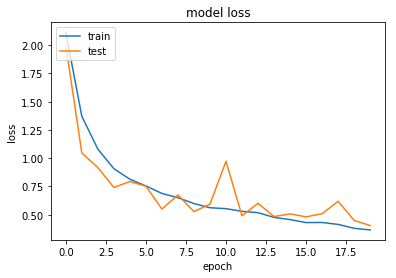

acc: 85.68%


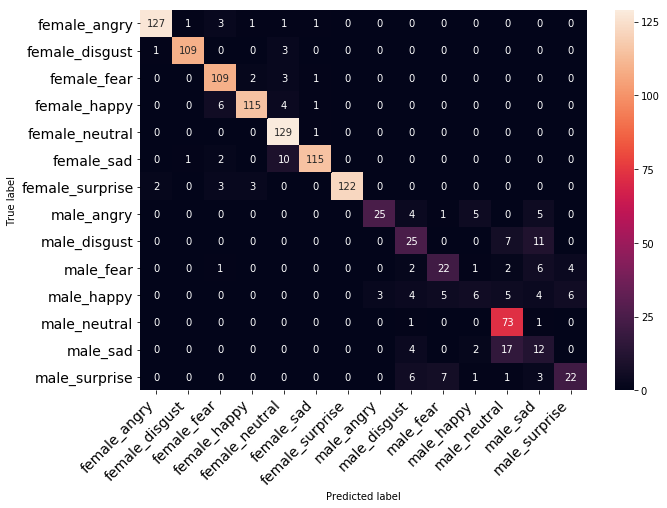

In [62]:
results = get_results(model1_history,model,X_test,y_test, ref.labels.unique())
results.create_plot(model1_history)
results.create_results(model1)
results.confusion_results(X_test, y_test, ref.labels.unique(), model1)

Note that after applying 2D ConvNet we may got less accuracy but our validation loss increases drastically as well as our model is converging.

# MFCC with Augmentation

In [63]:
sampling_rate=44100
audio_duration=2.5
n_mfcc = 30
mfcc_aug = prepare_data(ref, n = n_mfcc, aug = 1, mfcc = 1)

100%|██████████| 4720/4720 [02:13<00:00, 35.46it/s]


In [64]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(mfcc_aug
                                                    , ref.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

# Normalization as per the standard NN process
# mean = np.mean(X_train, axis=0)
# std = np.std(X_train, axis=0)

# X_train = (X_train - mean)/std
# X_test = (X_test - mean)/std

# Build CNN model 
model2 = get_2d_conv_model(n=n_mfcc)
model2_history = model2.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    batch_size=16, verbose = 2, epochs=20)

Train on 3540 samples, validate on 1180 samples
Epoch 1/20
 - 5s - loss: 2.1853 - acc: 0.2994 - val_loss: 1.6600 - val_acc: 0.4644
Epoch 2/20
 - 3s - loss: 1.4900 - acc: 0.5209 - val_loss: 1.2593 - val_acc: 0.5915
Epoch 3/20
 - 3s - loss: 1.2105 - acc: 0.5980 - val_loss: 0.9458 - val_acc: 0.6847
Epoch 4/20
 - 3s - loss: 1.0529 - acc: 0.6460 - val_loss: 1.0927 - val_acc: 0.6229
Epoch 5/20
 - 3s - loss: 0.9445 - acc: 0.6828 - val_loss: 0.7387 - val_acc: 0.7508
Epoch 6/20
 - 3s - loss: 0.8631 - acc: 0.7102 - val_loss: 0.7250 - val_acc: 0.7534
Epoch 7/20
 - 4s - loss: 0.7847 - acc: 0.7359 - val_loss: 0.7339 - val_acc: 0.7517
Epoch 8/20
 - 3s - loss: 0.7420 - acc: 0.7387 - val_loss: 0.7722 - val_acc: 0.7356
Epoch 9/20
 - 3s - loss: 0.7032 - acc: 0.7602 - val_loss: 0.6758 - val_acc: 0.7771
Epoch 10/20
 - 3s - loss: 0.6718 - acc: 0.7692 - val_loss: 0.6378 - val_acc: 0.7780
Epoch 11/20
 - 3s - loss: 0.6501 - acc: 0.7669 - val_loss: 0.6334 - val_acc: 0.7814
Epoch 12/20
 - 3s - loss: 0.6261 - ac

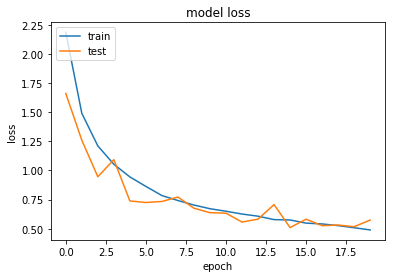

acc: 79.58%


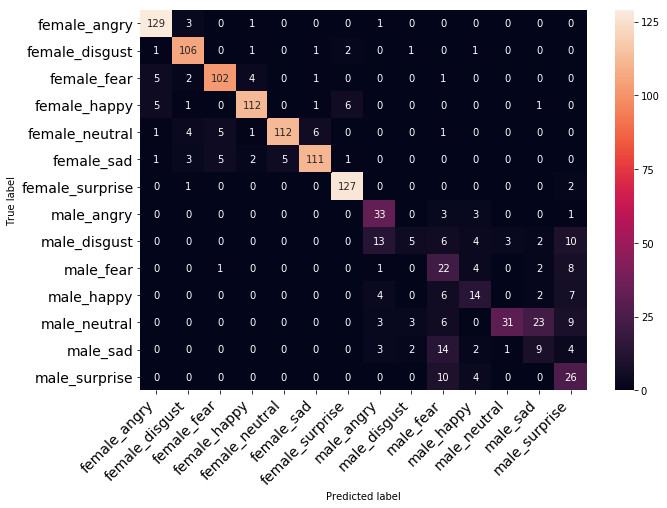

In [65]:
results = get_results(model2_history,model2,X_test,y_test, ref.labels.unique())
results.create_plot(model2_history)
results.create_results(model2)
results.confusion_results(X_test, y_test, ref.labels.unique(), model2)

# Conclusion
**From the above observation we found that after adding augmented data to the dataset and we slighltly improve the dataset which is quite around 83% and validation accuracy is around 76% **

From all the models which is used to train we found that **MFCC without augmentation** higher precision 
Accuracy=85%
validation Accuracy=81%
so we are going to save that model

In [66]:
#Save weights to HDF5
filepath="Emotion_Model2.h5"
model1.save(filepath)

#Serialize to json format
model1_json=model1.to_json()
with open("model1.json","w") as json_file:
    json_file.write(model1_json)
print("Saved model to disk")


Saved model to disk


In [67]:
#Loading json and create model
json_file=open("model1.json","r")
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)
#Load weights into new model
loaded_model.load_weights("Emotion_Model2.h5")
print("Loaded Model from disk")

#Evaluate Model
loaded_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
score=loaded_model.evaluate(X_test, y_test, verbose=0)
print(loaded_model.metrics_names[1],score[1]*100)

Loaded Model from disk
acc 87.2033915681354


# Prediction on new data

In [139]:
newData,newSR= librosa.load("/kaggle/input/my-data/Recording.wav")

This is my voice that I recorded and converted into .wav format

In [140]:
ipd.Audio("/kaggle/input/my-data/Recording.wav")

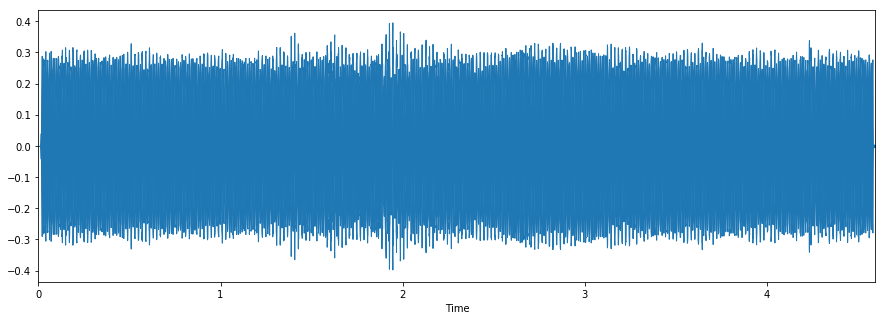

In [141]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(newData, sr=newSR)

In [142]:
# Lets transform the dataset so we can apply the predictions
newData, newSR = librosa.load("/kaggle/input/my-data/Recording.wav"
                              ,duration=2.5
                              ,sr=44100
                              ,offset=0.5)

newSR = np.array(newSR)
mfccs = np.mean(librosa.feature.mfcc(y=newData, sr=newSR, n_mfcc=13),axis=0)
newdf = pd.DataFrame(data=mfccs).T
newdf

0         1         2         3         4         5         6    \
0  2.898451  2.076396  0.280266 -0.006765 -1.064107 -0.225621  0.227837   

        7         8         9    ...       206      207       208       209  \
0 -0.326325  0.593696 -0.034544  ... -0.335356  0.82174  0.728199 -1.232968   

        210       211       212       213       214       215  
0  0.246404  0.627014  0.766288 -1.356455  1.405634  4.892801  

[1 rows x 216 columns]

In [143]:
newdf= np.expand_dims(newdf,axis=2)
print(newdf.shape)
newpred=model.predict(newdf)

(1, 216, 1)


In [144]:
filename = filename = '/kaggle/input/labels/labels'
infile = open(filename,'rb')
lb = pickle.load(infile)
infile.close()

# Get the final predicted label
final = newpred.argmax(axis=1)
final = final.astype(int).flatten()
final = (lb.inverse_transform((final)))
print(final) #emo(final) #gender(final) 

['male_happy']
